1. Loading Required Libraries

In [2]:
#Data Manipulation
import pandas as pd

#Visualization
import matplotlib.pyplot as plt

2. Loading the data

In [29]:
# Load CSV without parse_dates (avoids Pandas' automatic inference issues)
df = pd.read_csv(r'E:\Projects\Python\Personal\LA Crime Analysis\Data\Raw\Crime_Data_from_2020_to_2024.csv').set_index('DR_NO')

# Manually enforce date parsing with correct format and error handling
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %H:%M')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %H:%M')

3. Initial Data Inspection

In [4]:
#Checking file structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003626 entries, 190326475 to 240910892
Data columns (total 27 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Date Rptd       1003626 non-null  datetime64[ns]
 1   DATE OCC        1003626 non-null  datetime64[ns]
 2   TIME OCC        1003626 non-null  int64         
 3   AREA            1003626 non-null  int64         
 4   AREA NAME       1003626 non-null  object        
 5   Rpt Dist No     1003626 non-null  int64         
 6   Part 1-2        1003626 non-null  int64         
 7   Crm Cd          1003626 non-null  int64         
 8   Crm Cd Desc     1003626 non-null  object        
 9   Mocodes         852192 non-null   object        
 10  Vict Age        1003626 non-null  int64         
 11  Vict Sex        859154 non-null   object        
 12  Vict Descent    859142 non-null   object        
 13  Premis Cd       1003610 non-null  float64       
 14  Premis Desc  

In [5]:
#Checking firts 5 rows
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
DR_NO,,,,,,,,,,,,,,,,,,,,,
190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [6]:
#Checking null values
df.isnull().sum()

Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151434
Vict Age                0
Vict Sex           144472
Vict Descent       144484
Premis Cd              16
Premis Desc           588
Weapon Used Cd     676853
Weapon Desc        676853
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           934582
Crm Cd 3          1001316
Crm Cd 4          1003562
LOCATION                0
Cross Street       849598
LAT                     0
LON                     0
dtype: int64

4. Data Cleaning

In [7]:
#Creating a list with unwanted columns
unwanted_columns = [
    'Part 1-2','Crm Cd','Crm Cd 1','Crm Cd 2','Crm Cd 3',
    'Crm Cd 4','LOCATION','Cross Street','Premis Cd','Weapon Used Cd',
    'Rpt Dist No','AREA','Status','Premis Desc'
]

#Removing said columns
df.drop(columns=unwanted_columns,inplace=True)

5. Data Filtering  

In [8]:
#Removing rows where victim age is greater than 0 and not equal to 120
df_cleaned = df[(df['Vict Age']>0) & (df['Vict Age'] != 120) & (df['LAT'] != 0)]

6. Data Standardization

In [9]:
#Changing data types
df_cleaned = df_cleaned.astype({
    'Vict Sex':'category',
    'Status Desc':'category',
    'Vict Descent':'category'
})

In [10]:
#Standardizing column names

standardized_columns = {
    'Date Rptd':'Date Reported',
    'DATE OCC':'Date Occurred',
    'TIME OCC':'Time Occurred',
    'AREA NAME':'Area Name',
    'Crm Cd Desc':'Crime Description',
    'Mocodes':'Modus Operandi',
    'Vict Age':'Victim Age',
    'Vict Sex':'Victim Sex',
    'Vict Descent':'Victim Ethnicity',
    'Premis Desc':'Location of Crime',
    'Weapon Desc':'Weapon Used',
    'Status Desc':'Status of case',
    'LAT':'Latitude',
    'LON':'Longitude'
}

df_cleaned.index.name = "Division of Records #"

#Applying dict to columns
df_cleaned.rename(columns=standardized_columns,inplace=True)

In [11]:
#Standardizing sex column values

def standardized_sexes(sex):
    sex = str(sex).strip().upper()  # Normalize input

    if sex == 'M':
        return 'Male'
    elif sex == 'F':
        return 'Female'
    elif sex in ['X', 'H', '-']:
        return 'Unknown'
    else:
        return 'Unknown' 

df_cleaned['Victim Sex'] = df_cleaned['Victim Sex'].map(standardized_sexes)

In [12]:
#Standardizing Ethnicity column values

standardized_ethnicity = {
    "-":'Unknown',
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}

#Applying map to column
df_cleaned['Victim Ethnicity'] = df_cleaned['Victim Ethnicity'].map(standardized_ethnicity).fillna('Unknown')

In [13]:
#creating lists to group the type of weapon used

Bladed_Weapons = [
        'AXE','BOWIE KNIFE','FOLDING KNIFE','KITCHEN KNIFE','KNIFE WITH BLADE 6INCHES OR LESS',
        'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH','MACHETE','OTHER KNIFE','RAZOR BLADE','SWITCH BLADE','SWORD','CLEAVER',
        'DIRK/DAGGER','RAZOR','STRAIGHT RAZOR'
]

Blunt_Objects = [
        'CLUB/BAT','CONCRETE BLOCK/BRICK','HAMMER','PIPE/METAL PIPE','ROCK/THROWN OBJECT','STICK','BLUNT INSTRUMENT','BLACKJACK'
]

Chemical_Weapons = ['CAUSTIC CHEMICAL/POISON','MACE/PEPPER SPRAY']

Explosives = ['BOMB THREAT']

Firearms = [
        'AIR PISTOL/REVOLVER/RIFLE/BB GUN','ANTIQUE FIREARM','ASSAULT WEAPON/UZI/AK47/ETC','AUTOMATIC WEAPON/SUB-MACHINE GUN',
        'HAND GUN','HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE','HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE','M1-1 SEMIAUTOMATIC ASSAULT RIFLE',
        'M-14 SEMIAUTOMATIC ASSAULT RIFLE','MAC-10 SEMIAUTOMATIC ASSAULT WEAPON','MAC-11 SEMIAUTOMATIC ASSAULT WEAPON','OTHER FIREARM','RELIC FIREARM',
        'REVOLVER','RIFLE','SAWED OFF RIFLE/SHOTGUN','SEMI-AUTOMATIC PISTOL','SEMI-AUTOMATIC RIFLE','SHOTGUN','SIMULATED GUN','STARTER PISTOL/REVOLVER',
        'STUN GUN','TOY GUN','UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE','UNKNOWN FIREARM','UZI SEMIAUTOMATIC ASSAULT RIFLE'
]

other = [
        'BELT FLAILING INSTRUMENT/CHAIN','BOARD','BOTTLE','BOW AND ARROW','BRASS KNUCKLES','DEMAND NOTE',
        'DOG/ANIMAL (SIC ANIMAL ON)','EXPLOXIVE DEVICE','FIRE','FIXED OBJECT','GLASS','ICE PICK','LIQUOR/DRUGS','MARTIAL ARTS WEAPONS',
        'OTHER CUTTING INSTRUMENT','PHYSICAL PRESENCE','ROPE/LIGATURE','SCALDING LIQUID','SCISSORS','SCREWDRIVER','STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
        'SYRINGE','TIRE IRON','Unknown','UNKNOWN TYPE CUTTING INSTRUMENT','UNKNOWN WEAPON/OTHER WEAPON','VEHICLE','VERBAL THREAT'
]

#Creating a function which will categorize each weapon
def weapon_standardization(weapon):
        if weapon in Bladed_Weapons:
                return 'Bladed Weapons'
        elif weapon in Blunt_Objects:
                return 'Blunt Objects'
        elif weapon in Chemical_Weapons:
                return 'Chemical Weapons'
        elif weapon in Explosives:
                return 'Explosives'
        elif weapon in Firearms:
                return 'Firearms'
        elif weapon in other:
                return 'Other Weapons'
        else:
                return 'Unknown'

#Applying function to the weapon used column     
df_cleaned['Weapon Used'] = df_cleaned['Weapon Used'].apply(weapon_standardization)

In [14]:
#Standardizing the time occurred column values

df_cleaned['Time Occurred'] = df_cleaned['Time Occurred'].astype(str).str.zfill(4)

def time_fixer(time):
    return f'{time[:2]}:{time[2:]}'

df_cleaned['Time Occurred'] = df_cleaned['Time Occurred'].apply(time_fixer)
df_cleaned['Time Occurred'] = pd.to_datetime(df_cleaned['Time Occurred'], format='%H:%M').dt.strftime('%I:%M %p')

6. Data Exploration

In [15]:
# Creating a column for days elapsed between reported & occurred dates
df_cleaned['Days Elapsed'] = (df_cleaned['Date Reported'] - df_cleaned['Date Occurred']).dt.days

# Extracting Year, Quarter, and Month directly from the datetime column
df_cleaned['Year'] = df_cleaned['Date Occurred'].dt.year
df_cleaned['Quarter'] = df_cleaned['Date Occurred'].dt.quarter
df_cleaned['Month'] = df_cleaned['Date Occurred'].dt.month_name()

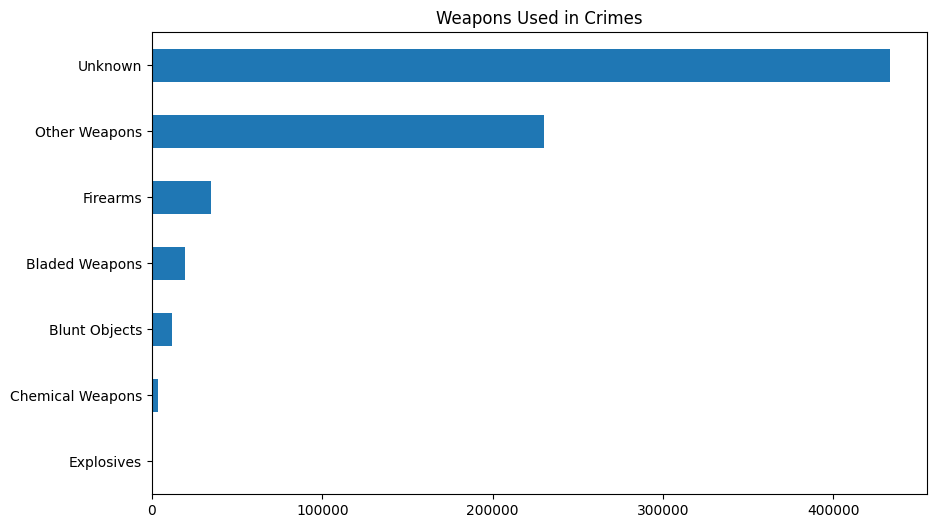

In [16]:
#General view of weapons used in crimes
df_cleaned['Weapon Used'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))

plt.title('Weapons Used in Crimes')
plt.xlabel('')
plt.ylabel('')

plt.show()

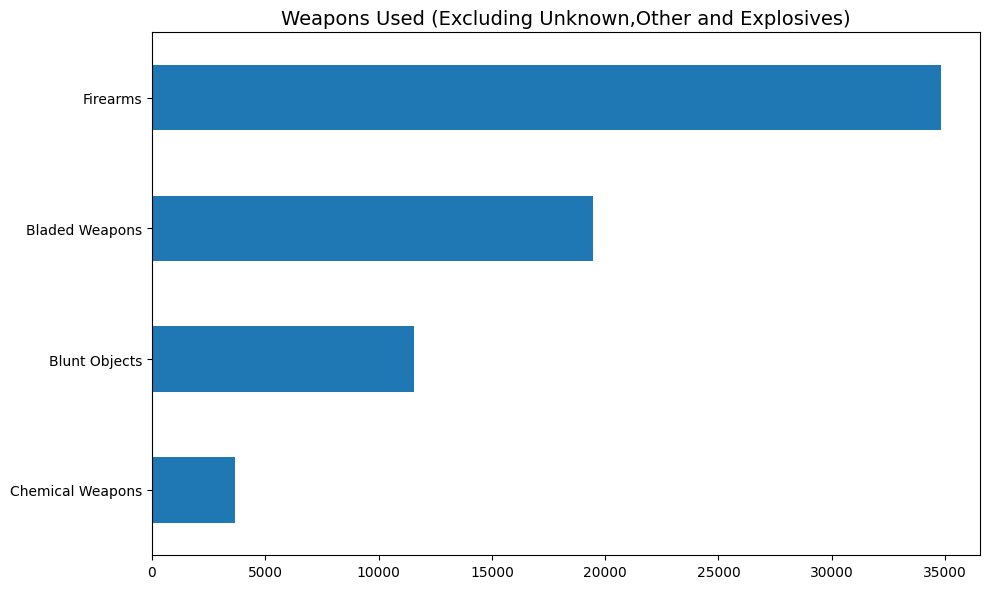

In [17]:
# Filter out 'Unknown' and 'Other Weapons'
df_filtered = df_cleaned[~df_cleaned['Weapon Used'].isin(['Unknown', 'Other Weapons','Explosives'])]

# Create the bar plot
ax = df_filtered['Weapon Used'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))

# Labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Weapons Used (Excluding Unknown,Other and Explosives)', fontsize=14)

plt.tight_layout()
plt.show()

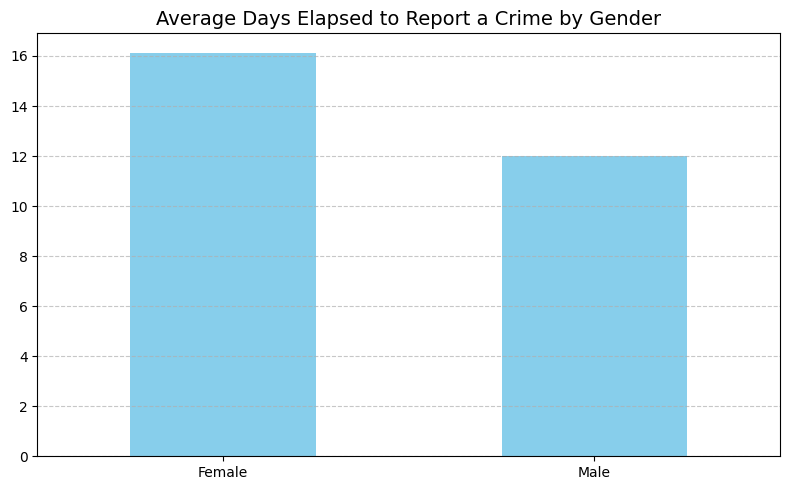

In [18]:
# Calculate mean days elapsed by gender
genders_df = df_cleaned.pivot_table(
    index='Victim Sex',
    values='Days Elapsed',
    aggfunc='mean'
).round(1)  # Round to one decimal place for clarity

# Remove 'Unknown' gender
genders_df = genders_df[genders_df.index != 'Unknown']

# Plot
ax = genders_df.plot(kind='bar', legend=False, figsize=(8, 5), color='skyblue')

# Labels & title
plt.title('Average Days Elapsed to Report a Crime by Gender', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

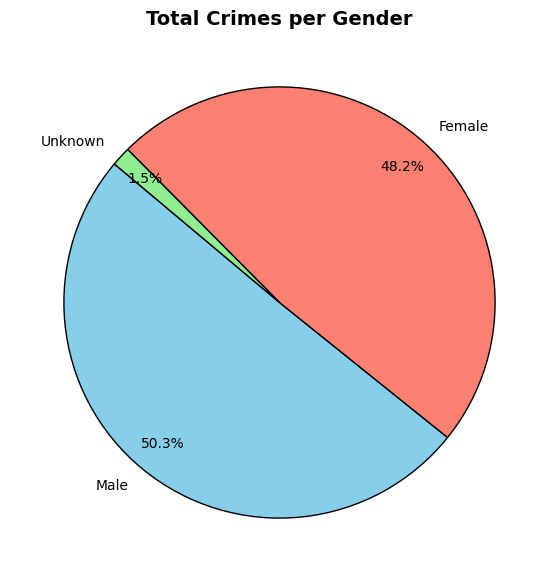

In [19]:
# Filter out 'Unknown'
df_pie = df_cleaned['Victim Sex'].value_counts()

# Define color palette
colors = ['skyblue', 'salmon', 'lightgreen']

# Plot
plt.figure(figsize=(7, 7))
df_pie.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140, 
            wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

# Title & Formatting
plt.title('Total Crimes per Gender', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.show()

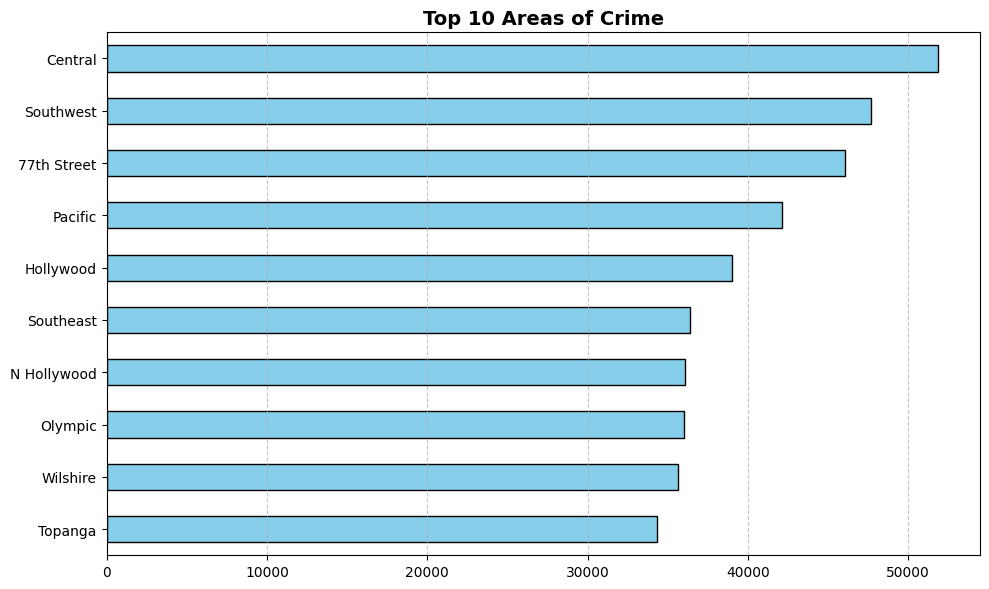

In [20]:
# Get top 10 crime areas
top_areas = df_cleaned['Area Name'].value_counts().head(10).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
ax = top_areas.plot(kind='barh', color='skyblue', edgecolor='black')

# Labels & Title
plt.title('Top 10 Areas of Crime', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

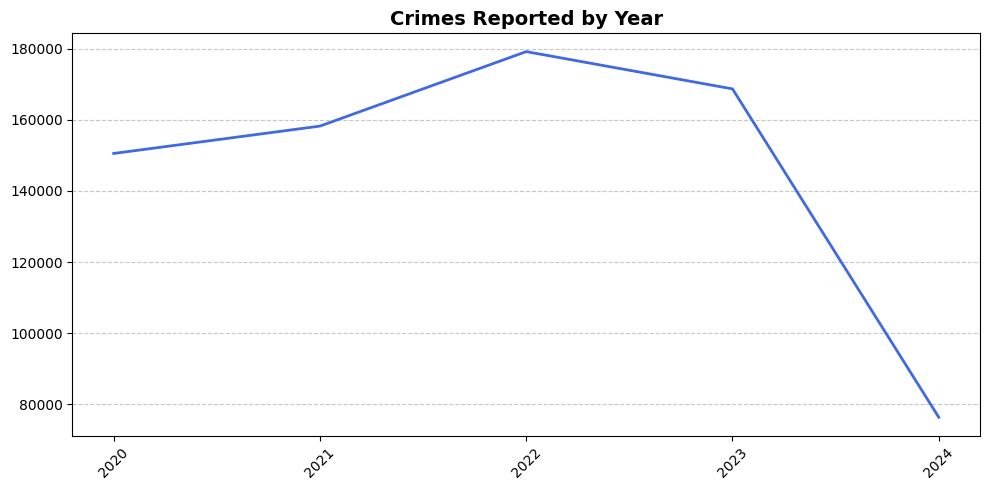

In [21]:
# Get crime counts by year, sorted in ascending order
years_df = df_cleaned['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
ax = years_df.plot(linestyle='-', linewidth=2, color='royalblue')

# Title & Labels
plt.title('Crimes Reported by Year', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure all years are shown on x-axis
plt.xticks(ticks=years_df.index, rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

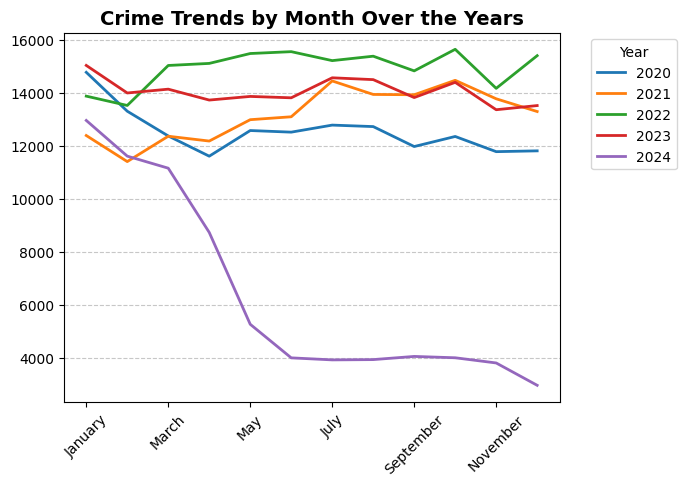

In [22]:
# Define month order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Convert 'Month' column to categorical with correct order
df_cleaned["Month"] = pd.Categorical(df_cleaned["Month"], categories=month_order, ordered=True)

# Create pivot table for monthly crime counts by year
years_and_months_df = df_cleaned.pivot_table(
    index="Month",
    values="Victim Age",
    columns="Year",
    aggfunc="count",
    observed=True
)

# Sort index to ensure correct month order
years_and_months_df = years_and_months_df.sort_index()

# Plot
plt.figure(figsize=(12, 6))
years_and_months_df.plot(linewidth=2)  

# Title & Labels
plt.title('Crime Trends by Month Over the Years', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<Figure size 1000x600 with 0 Axes>

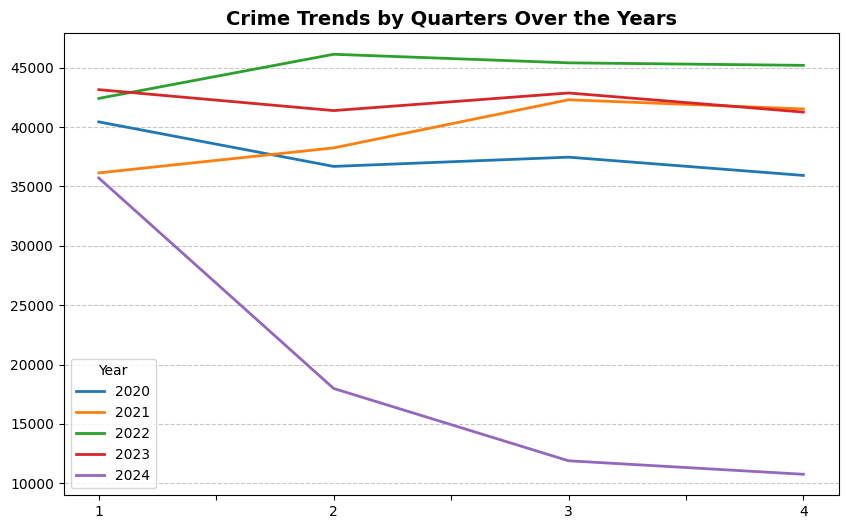

In [23]:
# Define month order
df_cleaned['Quarter'] = pd.Categorical(df_cleaned['Quarter'], categories=[1, 2, 3, 4], ordered=True)

# Convert 'Month' column to categorical with correct order
df_cleaned['Month'] = pd.Categorical(df_cleaned['Month'], categories=month_order, ordered=True)

# Create pivot table for monthly crime counts by year
years_and_months_df = df_cleaned.pivot_table(
    index='Quarter',
    values='Victim Age',
    columns='Year',
    aggfunc='count',
    observed=True
)

# Sort index to ensure correct month order
years_and_months_df = years_and_months_df.sort_index()

# Plot
plt.figure(figsize=(10, 6))
ax = years_and_months_df.plot(linewidth=2, figsize=(10, 6))

# Title & Labels
plt.title('Crime Trends by Quarters Over the Years', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year')

plt.show()

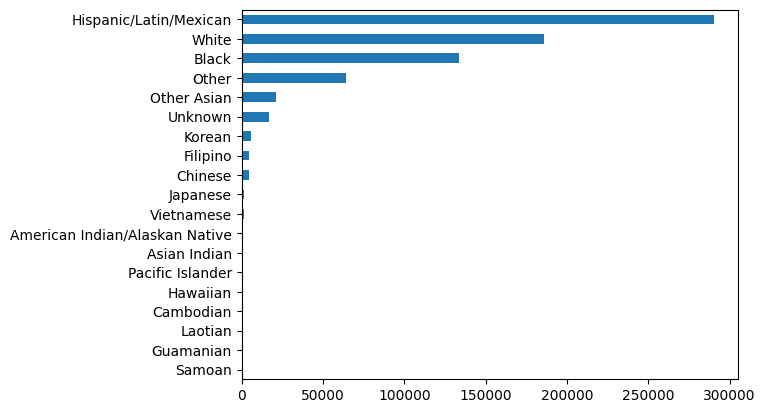

In [24]:
#Total crimes by ethnicity
victim_Ethnicity = df_cleaned['Victim Ethnicity'].value_counts().sort_values()
victim_Ethnicity.plot(kind='barh')
plt.ylabel('')
plt.show()

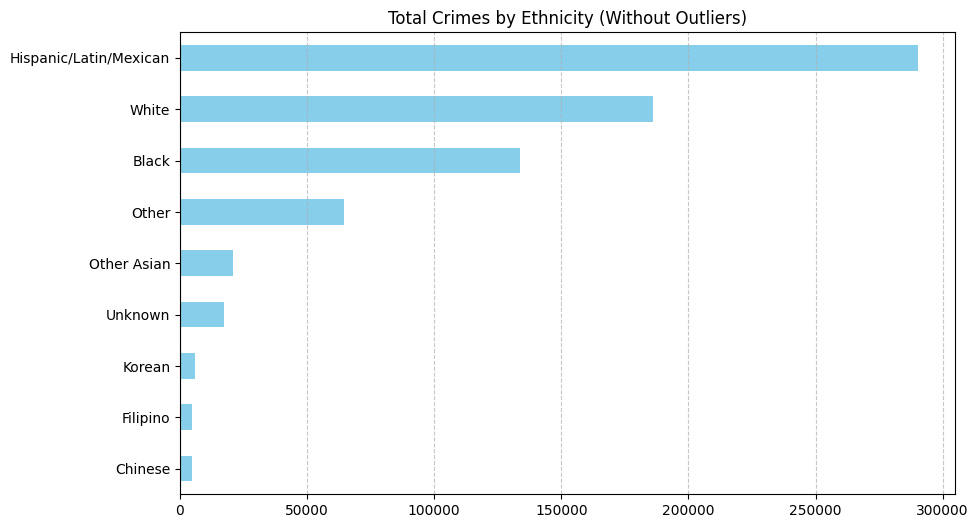

In [25]:
# Filter out outlier ethnicities
valid_ethnicities = [
    'Chinese', 'Filipino', 'Korean', 'Unknown', 
    'Other Asian', 'Other', 'Black', 'White', 'Hispanic/Latin/Mexican']

filtered_df = df_cleaned[df_cleaned['Victim Ethnicity'].isin(valid_ethnicities)]

# Count occurrences
ethnicity_counts = filtered_df['Victim Ethnicity'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
ethnicity_counts.plot(kind='barh', color='skyblue')
plt.xlabel('')
plt.ylabel('')
plt.title('Total Crimes by Ethnicity (Without Outliers)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Saving cleaned dataset for other uses.
df_cleaned.to_csv(r'E:\Projects\Python\Personal\LA Crime Analysis\Data\Clean\LA Crime Data - Cleaned.csv')